In [59]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

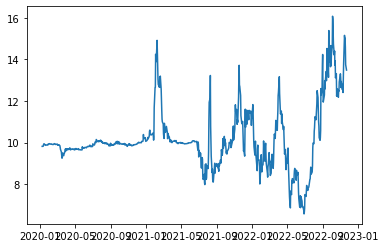

In [60]:
data = pdr.get_data_yahoo("FREY")
plt.plot(data['Close'])

In [64]:
close = data["Close"].values
training_data_len = math.ceil(len(close) * 0.8)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(close.reshape(-1, 1))
train = data_scaled[:training_data_len, :]

In [65]:
X_train = []
y_train = []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
test = data_scaled[training_data_len - 60:, :]
X_test =[]
y_test = close[training_data_len:]
for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="Adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17/17 [==============================] - 5s 50ms/step - loss: 0.0366
Epoch 2/100
17/17 [==============================] - 1s 51ms/step - loss: 0.0120
Epoch 3/100
17/17 [==============================] - 1s 51ms/step - loss: 0.0103
Epoch 4/100
17/17 [==============================] - 1s 53ms/step - loss: 0.0099
Epoch 5/100
17/17 [==============================] - 1s 54ms/step - loss: 0.0099
Epoch 6/100
17/17 [==============================] - 1s 57ms/step - loss: 0.0100
Epoch 7/100
17/17 [==============================] - 1s 55ms/step - loss: 0.0103
Epoch 8/100
17/17 [==============================] - 1s 58ms/step - loss: 0.0097
Epoch 9/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0104
Epoch 10/100
17/17 [==============================] - 1s 67ms/step - loss: 0.0097
Epoch 11/100
17/17 [==============================] - 1s 66ms/step - loss: 0.0092
Epoch 12/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0093
Epoch 13/100
17/17 [=====

In [69]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)
rmse

5/5 [==============================] - 0s 17ms/step


0.14068913459777832

C:\Users\16692\AppData\Local\Temp\ipykernel_3676\3230212111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["Predictions"] = prediction


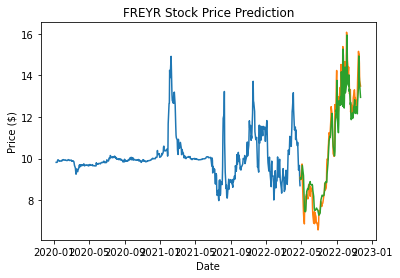

In [70]:
data = data.filter(["Close"])
train = data[:training_data_len]
validation = data[training_data_len:]
validation["Predictions"] = prediction
plt.title("FREYR Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.plot(train)
plt.plot(validation[["Close", "Predictions"]])
plt.show()